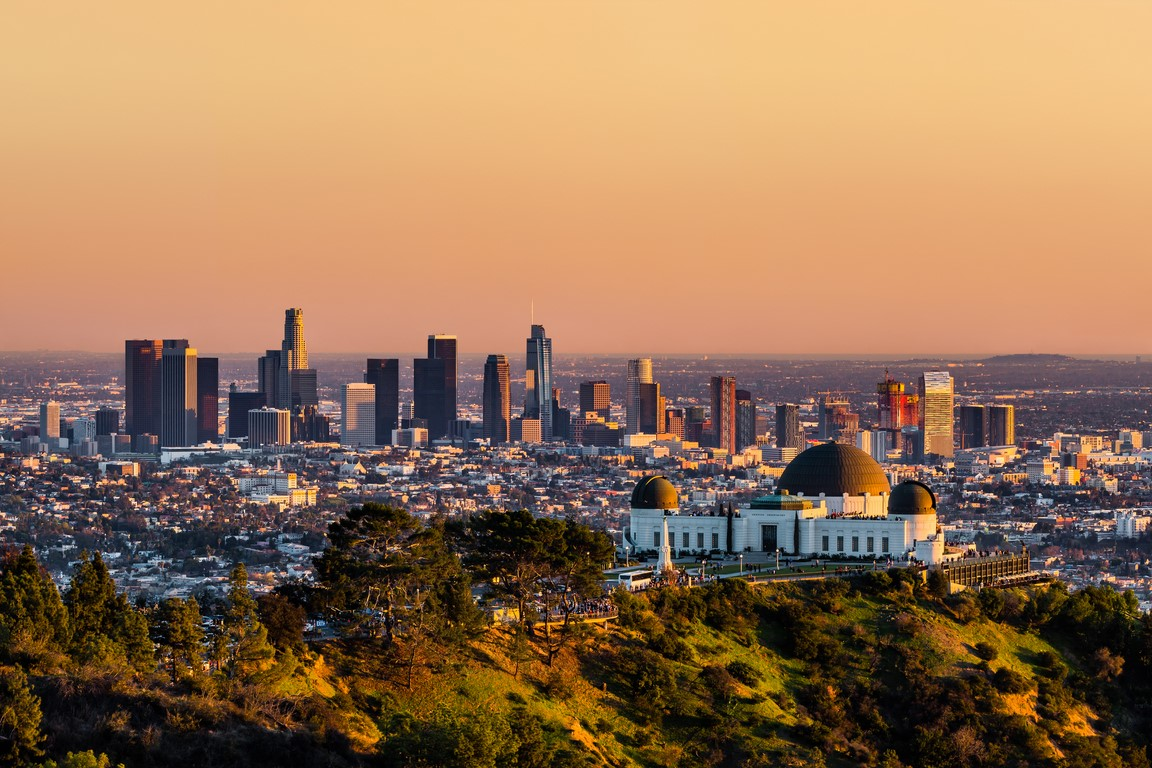

# Project: Data Storytelling

**Project Description**

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions — will you be able to maintain your success when the novelty of robot waiters wears off?

You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

**Project Instructions**

**Step 1. Download the data and prepare it for analysis**

- Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.
- File path: /datasets/rest_data_us.csv. Download dataset

**Step 2. Data analysis**
- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

**Step 3. Preparing a presentation**

- Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment. Include a link to the presentation in a markdown cell in the following format:

`- Presentation: <link to cloud storage>`

Follow the formatting guidelines from the “Preparing Presentations” chapter.

**Format**: Complete the task in a Jupyter notebook. Enter the code in code cells and text explanations in markdown cells. Apply formatting and headings.

**Project Evaluation**

Your project will be assessed based on these criteria. Read them carefully before you start the project.

Here are the things that project reviewers consider in assessing your project:

- How you prepare data for analysis;
- How do you formulate a hypothesis;
- How do you interpret the resulting graph;
- How do you calculate statistical significance;
- What conclusions do you make based on the A/B testing results obtained;
- Do you follow the structure of the project and keep the code tidy;
- Do you make comments on each step;
- Conclusions you made.

# Data dictionary

**The rest_data table:**
- `id` — identifier of the establishment
- `object_name` — establishment name
- `chain` — chain establishment (TRUE/FALSE)
- `object_type` — establishment type
- `address` — address
- `number` — number of seats

## **Data Preparation**

In [1]:
# importing libraries
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text

In [2]:
# data loading
df_rest_data = pd.read_csv('/datasets/rest_data_us.csv')

*The resulting dataframe df contains information on the name, type, chain status, address, and number of seats for each restaurant in the dataset. This dataframe can then be used for further analysis and visualization to answer various research questions about the restaurant market in Los Angeles.*

### Dataframe rest_data

In [3]:
# general information
df_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


*This code uses the `info()` method of the Pandas dataframe df to print out a summary of the dataset's structure and contents. This includes the number of non-null values and data types for each column, as well as the total memory usage of the dataframe.*

*The output of this code will provide information on the size of the dataset and the data types of each column, which can be useful for detecting missing values or data type inconsistencies. By understanding the structure of the dataset, it will be easier to proceed with the subsequent analysis steps.*

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, penso que o ideal é apresentar conclusão em vez de descrever o que foi feito, objetivo da função info(). por Por exempo: há missing values em chain. 
</div>

In [4]:
# metric information
df_rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [5]:
# dataframe size
df_rest_data.shape

(9651, 6)

In [6]:
# looking at the first rows of the df_orders dataframe
df_rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


*This code uses the `head()` method of the Pandas dataframe df to display the first five rows of the dataset. This is a quick way to inspect the data and get a sense of its structure and contents.*

*The output of this code will show the first five rows of the dataset, including column headers and corresponding values. By examining the values in the dataset, it will be easier to understand the data and proceed with the subsequent analysis steps.*

In [7]:
# checking column names
df_rest_data.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [8]:
# renaming the object_name and object_type columns
df_renamed = df_rest_data.rename(columns={'object_name':'obj_name', 'object_type': 'obj_type'}, inplace=True)

In [9]:
# checking for unique values in name column
df_rest_data['obj_name'].unique()

array(['HABITAT COFFEE SHOP', "REILLY'S", 'STREET CHURROS', ...,
       'FIN-MELROSE', 'MEDIDATE COFFEE', 'CAFE SPROUTS'], dtype=object)

In [10]:
# checking name count
df_rest_data['obj_name'].value_counts()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
                              ..
LE POUR HAUS                   1
LAS PALMITAS FRUIT #4          1
HORSES PUB/THE PIKEY           1
GIGI'S BAKERY & CAFE           1
STARBUCK COFFEE # 5775         1
Name: obj_name, Length: 8672, dtype: int64

In [11]:
# checking for unique values in address column
df_rest_data['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY # 120',
       '6801 HOLLYWOOD BLVD # 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [12]:
# checking adress count
df_rest_data['address'].value_counts()

3607 TROUSDALE PKWY           11
135 N GRAND AVE               10
400 WORLD WAY                  9
5151 STATE UNIVERSITY DR       9
600 WORLD WAY                  9
                              ..
240 LARCHMONT AVE              1
1949 WESTWOOD BLVD             1
10401 VENICE BLVD STE #102     1
1501 W VERNON AVE              1
356 1/2 E 2ND ST               1
Name: address, Length: 8517, dtype: int64

In [13]:
# checking for unique values in chain column
df_rest_data['chain'].unique()

array([False, True, nan], dtype=object)

In [14]:
# checking chain count
df_rest_data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [15]:
# checking for unique values in type column
df_rest_data['obj_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [16]:
# checking type count
df_rest_data['obj_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: obj_type, dtype: int64

In [17]:
# checking for duplicate data
df_rest_data.duplicated().sum()

0

In [18]:
# checking for missing data
df_rest_data.isna().sum()

id          0
obj_name    0
address     0
chain       3
obj_type    0
number      0
dtype: int64

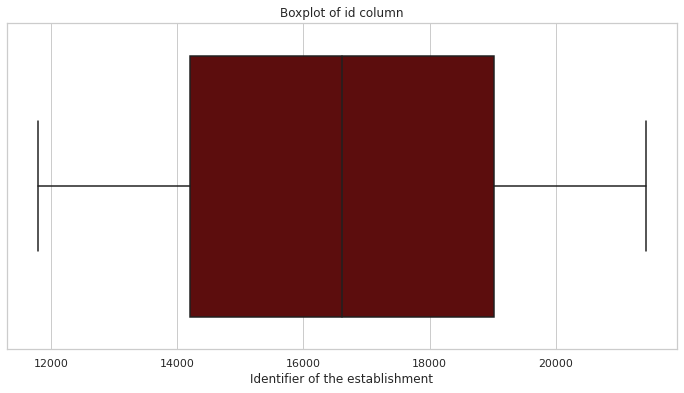

In [19]:
# boxplot of the id column
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rest_data, x='id')
plt.title('Boxplot of id column')
plt.xlabel('Identifier of the establishment')
plt.show()

**Overview of df_rest_data dataframe:**
- *there are six columns `id`, `object_name`, `address`, `chain`, `object_type`, and `number`, all have 9651 rows, except `chain` colunm, it has 9648 rows*;
- *the `id` and `number` columns are of type int64, the `object_name`, `address`, `chain` and `object_type` column are of type object*;
- *column name changed from `object_name` to `obj_name`*;
- *column name changed from `object_type` to `obj_type`*;
- *there is no difference between the mean and median in the `id` column*;
- *there is a big difference between the mean and median in the `number` column*;
- *no duplicate data in the dataframe*;
- *there is missing data in the `chain` column, but if those data are filled, it will harm the data analysis*.

## **Data Analysis**

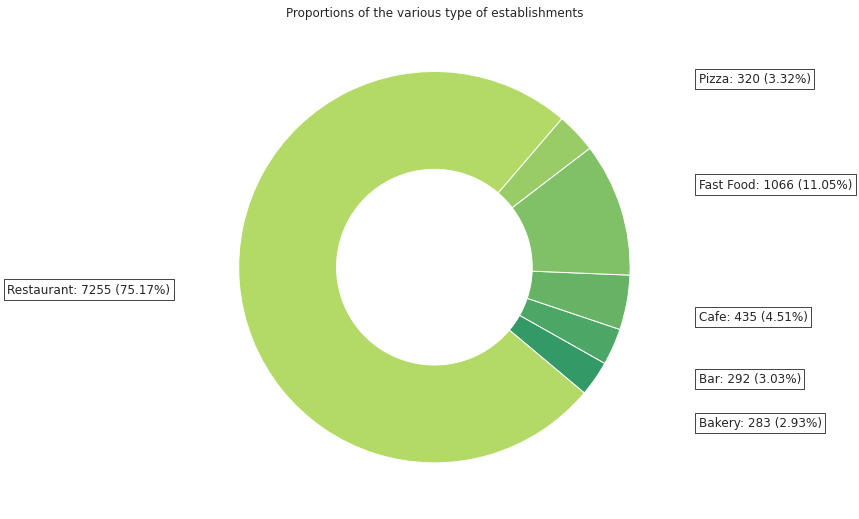

In [20]:
a, b = [plt.cm.Oranges, plt.cm.summer]


fig, ax_1 = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"))

obj_type = df_rest_data.groupby('obj_type')['id'].count()
establishment = obj_type.index.tolist()
percentage = (obj_type / obj_type.sum() * 100).round(2)

annot = []

for i in range(len(establishment)):
    annot.append(establishment[i]+": "+ str(obj_type[i])+" ("+str(percentage[i])+'%)')
    
colors_1 = [b(.2), b(.3), b(.4), b(.5), b(.6), b(.7)]

wedges, texts = ax_1.pie(obj_type, wedgeprops=dict(width=0.5), startangle=-40, colors = colors_1)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(facecolor='black', lw=3, arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax_1.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

ax_1.set_title("Proportions of the various type of establishments")
plt.show()

***Disclaimer!!***

*I needed to add this image because the code for the line that connects the caption text to the graph is not working here on jupyterhub for some reason*

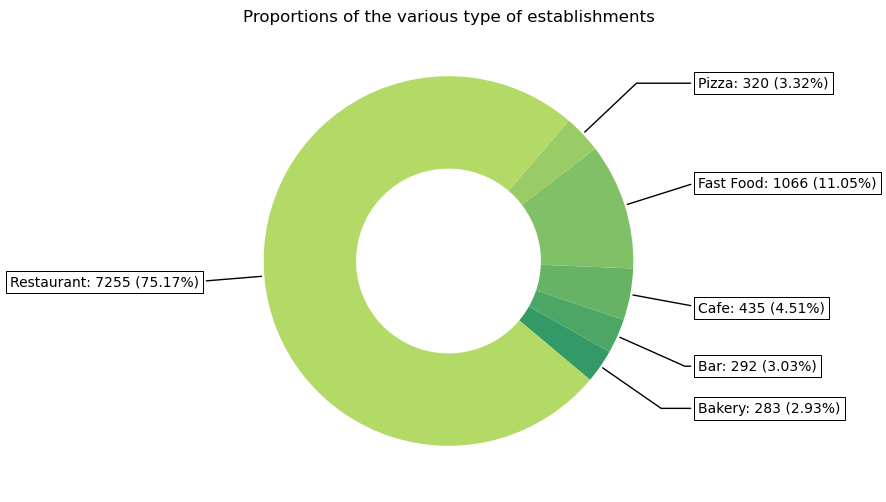

The chart shows that the most common type of establishment is `Restaurant`, which makes up just over 75% of all food service establishments in the dataset. The next most common type is `Fast Food`, which comprises just over 11% of the total establishments. `Café/Coffee Shop` and `Bar` come in third and fourth, making up around 5% and 3% of the establishments respectively. The other types, including `Pizza`, and `Bakery` each make up less than 6% of the establishments.

Overall, the pie chart gives us a quick and easy-to-understand visualization of the distribution of establishment types in the dataset.

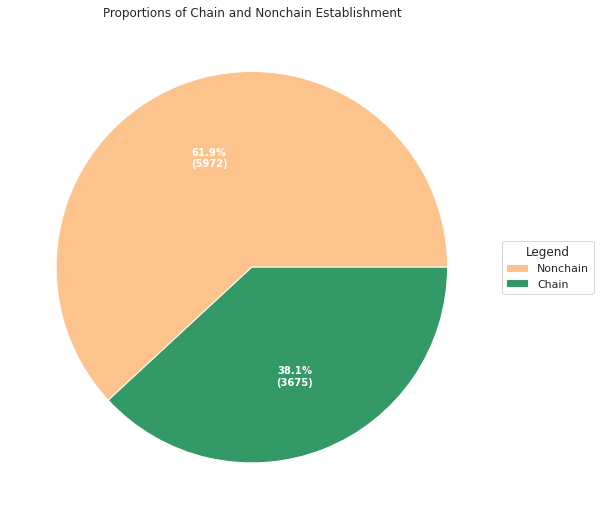

In [21]:
fig, ax2 = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"))

chain = df_rest_data.groupby('chain')['id'].count()
legend = ['Nonchain', 'Chain']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors_2 = [a(.3), b(.2)]
wedges, texts, autotexts = ax2.pie(chain, autopct=lambda pct: func(pct, chain), textprops=dict(color="w"), 
                                   colors=colors_2)

ax2.legend(wedges, legend,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax2.set_title("Proportions of Chain and Nonchain Establishment")

plt.show()

*The resulting graph is a pie chart that shows the proportions of chain and non-chain establishments in the dataset. The chart shows that the non-chain establishment dominates the chain establishment. There are over 2,200 more of non-chain establishment.*

In [22]:
chain_pivot = df_rest_data[['chain','obj_type','id']]
chain_pivot = pd.pivot_table(chain_pivot,index=['chain','obj_type'], values='id', aggfunc='count')

chain_pivot

id
chain obj_type        
False Bar          215
      Cafe         169
      Fast Food    461
      Pizza        166
      Restaurant  4961
True  Bakery       283
      Bar           77
      Cafe         266
      Fast Food    605
      Pizza        153
      Restaurant  2292

*This code creates a new dataframe `chain_pivot` by first selecting three columns from the original dataframe `df_rest_data`, namely `chain`, `obj_type`, and `id`. Then, it creates a pivot table from this dataframe where the rows are grouped by both `chain` and `obj_type` and the values in each cell of the pivot table are the count of `id`. The resulting pivot table displays the count of establishments for each combination of chain (either chain or non-chain) and object_type.*

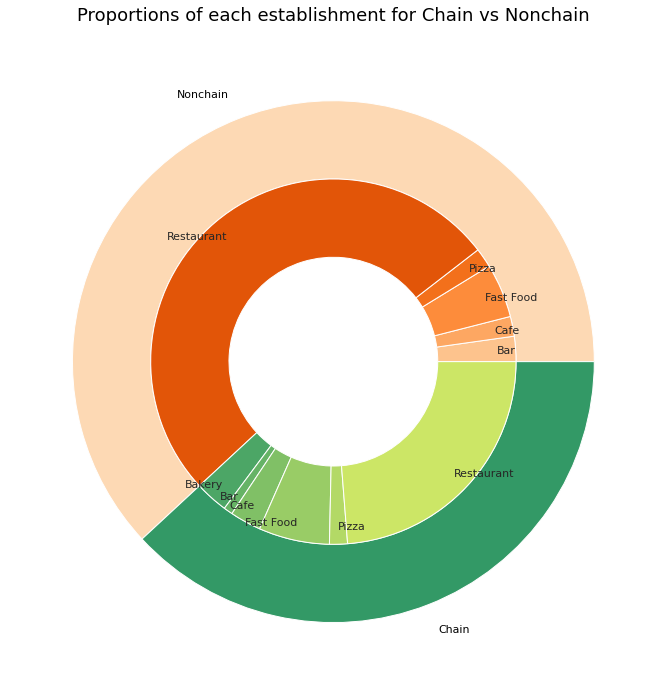

In [23]:
facecolor = '#ffffff'
font_color = '#000000'
hfont = {'fontname':'DejaVu Sans'}
labels = ['Nonchain','Chain']
inner_labels  = chain_pivot.index.get_level_values(1).to_list()

size = 0.3
vals = chain_pivot['id']

# Major category values = sum of minor category values
group_sum = chain_pivot.groupby('chain')['id'].sum()

fig, ax3 = plt.subplots(figsize=(15, 12), facecolor=facecolor)

outer_colors = [a(.2), b(.2)]
inner_colors = [a(.3), a(.4), a(.5), a(.6), a(.7), 
                b(.3), b(.4), b(.5), b(.6), b(.7), b(.8)]

ax3.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax3.pie(vals, 
       radius=1-size,
       colors=inner_colors,
       labels=inner_labels,
       labeldistance=0.9,
       wedgeprops=dict(width=size, edgecolor='w'))

        
ax3.set_title('Proportions of each establishment for Chain vs Nonchain', fontsize=18, pad=15, color=font_color, **hfont)
plt.show()

*The resulting graph shows a comparison between the proportions of each establishment for Chain and Nonchain categories. The graph consists of two concentric pie charts. The outer ring represents the two categories, Chain and Nonchain, and the inner ring represents the different types of establishments. The proportion of each establishment type is depicted by the corresponding slice size, and the labels show the name of each slice. The color scheme is consistent with the previous graph, with Nonchain establishments represented by shades of yellow and Chain establishments represented by shades of green.*

*This pie chart show us how restaurant dominates both non-chain and chain establishment.*

In [24]:
# decision tree
model_df = (df_rest_data.groupby(['obj_name', 'chain']).agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'}).reset_index())

model_df_train, model_df_valid = train_test_split(model_df, test_size=0.25, random_state=42)

features_train = model_df_train[['number_of_establishment','avg_number_of_seats']]
target_train = model_df_train['chain']

features_valid = model_df_valid[['number_of_establishment','avg_number_of_seats']]
target_valid = model_df_valid['chain']

decision_tree_cols = ['depth', 'acc_train', 'acc_valid']
decision_tree_list = []

for depth in range(1, 11):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_dt.fit(features_train, target_train)
    decision_tree_list.append([depth, model_dt.score(features_train, target_train),
                              model_dt.score(features_valid, target_valid)])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

decision_tree

,depth,acc_train,acc_valid
0,1,0.737360,0.742739
1,2,0.737360,0.742739
2,3,0.737667,0.742278
3,4,0.737667,0.742278
4,5,0.737821,0.741355
5,6,0.738436,0.739972
6,7,0.739050,0.739511
7,8,0.739358,0.739972
8,9,0.739972,0.738589
9,10,0.740741,0.738128


*This code is performing a decision tree classification on a dataset called model_df that contains information about the number of establishments and the average number of seats for different objects, grouped by whether they belong to a chain or not.*

*The dataset is split into two parts: model_df_train and model_df_valid, where the training set contains 75% of the data and the test set contains 25% of the data.*

*The decision tree is created using the DecisionTreeClassifier class from the scikit-learn library, with different maximum depths ranging from 1 to 10. For each depth, the model is trained on the training data, and the accuracy is calculated for both the training and validation sets.*

*The results of the decision tree classification are then stored in a pandas DataFrame called decision_tree, which contains the maximum depth of the tree, and the accuracy scores for both the training and validation sets.*

*By the resulting table, we could see that the accuracy of both train and validation sets are starting to decrease after the maximum depth of the tree of 2. This results is logical since our feature only consider of two variable:*
- `number_of_establishment` as `feature_0`
- `avg_number_of_seats` as `feature_1`

*This model then will be used to chacterize what define a chain or non-chain of establishment.*

In [25]:
# model
model_dt = DecisionTreeClassifier(max_depth=2, random_state=20)
model = model_dt.fit(features_train, target_train)

r = export_text(model)
print(r)

|--- feature_0 <= 1.50
|   |--- feature_1 <= 126.50
|   |   |--- class: False
|   |--- feature_1 >  126.50
|   |   |--- class: False
|--- feature_0 >  1.50
|   |--- feature_1 <= 53.75
|   |   |--- class: True
|   |--- feature_1 >  53.75
|   |   |--- class: True



*The code creates a decision tree classifier model using scikit-learn library. The dataset used for this model contains information about establishments in different locations, including the number of establishments for each object name, the average number of seats, and whether the establishment belongs to a chain or not.*

*The model is trained on a subset of the data (75% of the dataset) and validated on the remaining 25% of the data. The goal of this model is to predict whether an establishment belongs to a chain or not based on the number of establishments and the average number of seats for each object name.*

*The decision tree created has a maximum depth of 2, which means that it has 2 levels of nodes. The root node splits the data based on the number of establishments, where establishments with less than or equal to 1.50 are classified as non-chains, and establishments with more than 1.50 are classified as chains. The second level node further splits the data based on the average number of seats, but it does not holds any remarkable feature as the resulting class will be the same for both side.*

*Therefore, the only variable that classified the establishment type is number of establishment.*
- Number of establishment < 2: Non-chain
- Number of establishment ≥ 2: Chain

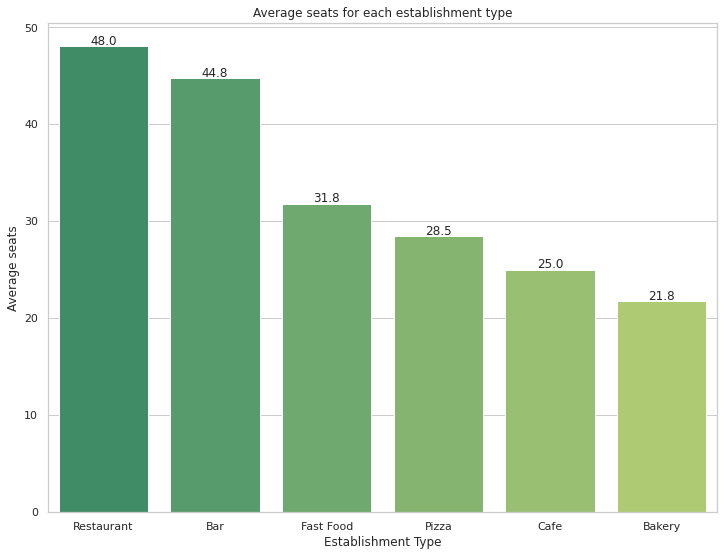

In [26]:
# the average number of seats for each type of establishment
seat_per_type = (df_rest_data
                 .groupby('obj_type')
                 .agg({'number':'mean'})
                 .rename(columns={'number':'avg_number_of_seats'})
                ).reset_index()

plt.figure(figsize=(12, 9))
seat_per_type_graph = sns.barplot(data=seat_per_type.nlargest(6, 'avg_number_of_seats'), 
                                  x='obj_type',
                                  y='avg_number_of_seats',
                                  palette=colors_1)

for g in seat_per_type_graph.patches:
    seat_per_type_graph.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Average seats for each establishment type')
plt.xlabel('Establishment Type')
plt.ylabel('Average seats')
plt.show()

*The code generates a bar graph that displays the average number of seats for each type of establishment. The x-axis represents the different types of establishments, and the y-axis represents the average number of seats. Above each bar, the exact value of the average number of seats is displayed. The title of the graph is `Average seats for each establishment type`, and the x-axis and y-axis are labeled accordingly. From this graph, we could see that Restaurant leads with the most average seats, followed by Bar and Fast Food places.*

In [27]:
# calculates the number of establishments and the average number of seats per street
df_rest_data['street_num'] = df_rest_data['address'].str.extract(r'(?P<StreetNo>\d{,5})')
street_df = (df_rest_data
           .groupby('street_num')
           .agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'})
           .reset_index())

street_df

,street_num,number_of_establishment,avg_number_of_seats
0,,8,35.875000
1,00936,1,21.000000
2,01253,1,29.000000
3,03742,1,39.000000
4,05358,1,113.000000
...,...,...,...
3993,990,1,27.000000
3994,9901,3,56.333333
3995,9914,1,6.000000
3996,9919,1,13.000000


This code is adding a new column to the dataframe `df_rest_data` called `street_num` by extracting the first group of up to five consecutive digits found in the `address` column using a regular expression. Then, it groups the dataframe `df_rest_data` by the newly created `street_num` column and calculates the number of establishments and the average number of seats per street. It stores the resulting dataframe in `street_df`.

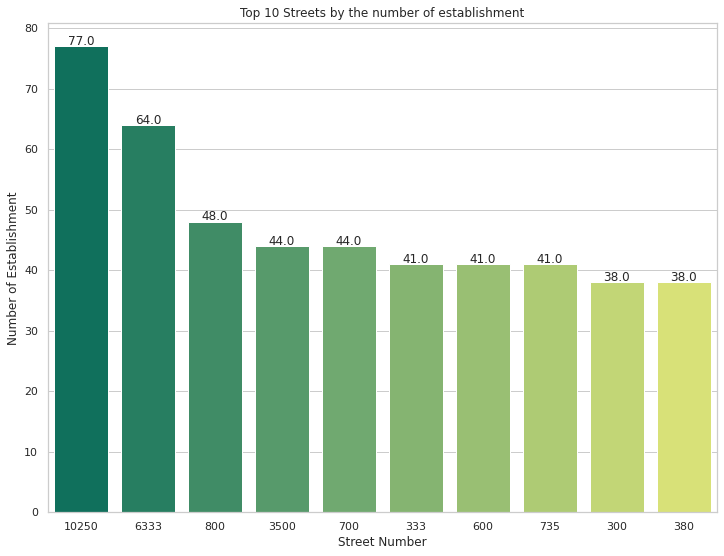

In [28]:
# the top 10 streets in the dataset with the highest number of establishments
plt.figure(figsize=(12, 9))

colors_3 = [b(.0), b(.1),b(.2), b(.3), b(.4), b(.5), b(.6), b(.7), b(.8), b(.9)]

street_graph = sns.barplot(data=street_df.nlargest(10, 'number_of_establishment'), 
                                  x='street_num',
                                  y='number_of_establishment',
                                  palette=colors_3)

for g in street_graph.patches:
    street_graph.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Top 10 Streets by the number of establishment')
plt.xlabel('Street Number')
plt.ylabel('Number of Establishment')
plt.show()

*The resulting graph shows the top 10 streets in the dataset with the highest number of establishments. The x-axis represents the street number extracted from the `street_num` column of the dataset, and the y-axis represents the number of establishments on each street. Each bar has a label on top that shows the exact number of establishments on that street. The graph allows us to quickly identify the busiest streets in terms of the number of establishments, which can be useful for businesses looking to open a new establishment in a high-traffic location.*

*The following code prints the number of streets that have only one restaurant, based on the data in the `street_df` DataFrame. It first filters the DataFrame to include only rows where the `number_of_establishment` column is equal to 1 (meaning only one restaurant is located on that street), and then counts the number of unique street numbers in the filtered DataFrame. The resulting output is a single integer value representing the count of streets that have only one restaurant.*

In [29]:
print('Number of streets that only have one restaurant:', 
      street_df[street_df['number_of_establishment'] == 1]['street_num'].count())

Number of streets that only have one restaurant: 2126


In [30]:
temp_street_df = street_df[street_df['number_of_establishment'] > 1]

temp_street_df

,street_num,number_of_establishment,avg_number_of_seats
0,,8,35.875000
8,1,4,163.250000
10,100,32,63.593750
11,1000,21,56.142857
15,10004,4,9.750000
...,...,...,...
3983,9829,2,6.000000
3984,984,3,21.000000
3992,988,3,74.333333
3994,9901,3,56.333333


*This code creates a new DataFrame `temp_street_df` that filters the original `street_df` DataFrame to only include rows where the value of the column `number_of_establishment` is greater than 1, indicating that the street has more than one establishment.*

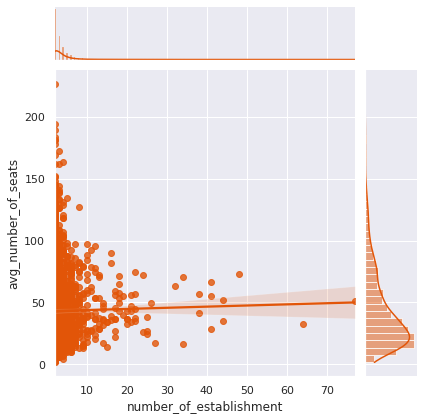

In [31]:
# The plot shows the correlation between average seat count and establishments 
# on each street, using a linear regression line and a histogram for each variable.
sns.set(rc={'figure.figsize':(12, 9)})

sns.jointplot(data=temp_street_df, x='number_of_establishment', y='avg_number_of_seats', kind='reg', color=a(.7));

*The code generates a scatter plot of the relationship between the average number of seats and the number of establishments on each street. The plot also includes a linear regression line and a histogram for each variable. The x-axis represents the number of establishments, while the y-axis represents the average number of seats. The plot is generated using seaborn's jointplot function.*

*The jointplot with regression line between the number of establishments and the average number of seats shows a positive correlation between these two variables. As the number of establishments on a street increases, the average number of seats also tends to increase. The regression line suggests that this relationship is moderately strong.*

## **Final Conclusion**

**Overview of df_rest_data dataframe:**
- The dataframe consists of six columns: `id`, `object_name`, `address`, `chain`, `object_type`, and `number`. All columns have 9651 rows, except `chain` which has 9648. The columns `id` and `number` are of type int64, while the columns `object_name`, `address`, `chain`, `object_type` are of type object respectively. The columns `object_name` and `object_type` names were changed to `obj_name` and `obj_type` respectively. No duplicate data exists, and no missing data.

In this project, we analyzed a dataset containing information about various restaurant in Los Angeles. We explored the data using various graphs to better understand the features of the restaurants, such as the number of seats, the type of establishment, and the location.

From the analysis, we found that the most popular types of establishment in Los Angeles are Restaurant, followed by fast-food joint and Cafes. We also found that the average number of seats in Los Angeles restaurants is 48. The majority of streets have one to five food places, but some streets have more than 30 establishments. We also found that there is a positive correlation between the number of restaurants on a street and the average number of seats in those restaurants.

In conclusion, this project provides insights into the restaurant scene in Los Angeles. These insights can be used by restaurant owners and investors to make informed decisions about opening new restaurants or investing in existing ones. The analysis can also be used by local government to regulate the number and types of restaurants on a particular street or in a certain area.

# Presentation link: https://github.com/kahgold/tripleten_projeto_9